<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 1 - Data Exploratory:** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Cardio Good Fitness**   

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
Exploring the Dataset...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Data Dictionary:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 1. **Product**: The model no. of the treadmill.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 2. **Age**:  Age of the customer in no of years.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 3. **Gender**: Gender of the customer.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 4. **Education**: Education of the customer in no. of years.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 5. **Marital Status**: Marital status of the customer.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 6. **Usage**: Avg. # times the customer wants to use the treadmill every week.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 7. **Fitness**: Self rated fitness score of the customer (5 - very fit, 1 - very unfit).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 8. **Income**: Income of the customer.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 9. **Miles**: Miles that a customer expects to run.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:**
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
Our focal point is the **Product Type**; There are 3 types of Treadmill being used by different customers with different characteristics.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
Initially, We will assume that **Miles** variable is the most important factor and could hugely influence the future sales and after-sale services. Current No. of customers for each product is not a strong sign of product's success; it's not how many customers do own a Treadmill, it's all about who is really using it.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
practically, Both Fitness and Usage must have a strong correlation with Miles; It's fair to say that more Usage leads to a longer distance, which in turn leads to higher fitness. 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
At the end, in order to outline the future potential customers, we will analyze the dataset and find out which variables are mostly related to higher Miles (It might be one or more of Age, Income, Education, Gender, or Marital Status). Once determined, we will be able to recommend one or more Product Type based on our analysis. 

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [1]:
# Start with importing the necessary libraries:
# 1. Data Reading and Manipulating:
import numpy as np
import pandas as pd

# 2. Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 3. Grid Settings:
sns.set_style(style = 'darkgrid')

In [2]:
# Loading the csv file and assign it to a variable df:
df = pd.read_csv('Project_01_DataExploratory_CardioFitness_Dataset.csv')

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Sanity Check:**  

In [3]:
# Ensuring that everything is working as expected by displaying the 1st five Data Rows:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Examining the No. of Data Rows and Columns:
df.shape

(180, 9)

In [5]:
# Examining the Dataset Information and Data Types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Dataset consists of 180 Data Rows and 9 Columns.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** No missing values have been found - each column contains 180 entries.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Columns Data Types are consistent with Data Nature; Columns with Numeric Entries have int64 Type, while String Entries have object Type.

In [6]:
# Although the previous step doesn't show any null values, we would like to double check:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
'''
Although no Null Value has been detected, it's better to make sure that all the values inside the object columns 
are meaningful. To do so, we will list down the uniquw values in each object column: 
'''
objects_var = ['Product' , 'Gender' , 'MaritalStatus'] # All Columns with String Data Type
numerics_var = ['Age' , 'Education' , 'Usage' , 'Fitness' , 'Income' , 'Miles'] # All Columns with Numeric Data Type
for i in objects_var:
    print(i+':')
    print(df[i].value_counts())
    print("-"*40)

Product:
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
----------------------------------------
Gender:
Male      104
Female     76
Name: Gender, dtype: int64
----------------------------------------
MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
----------------------------------------


In [8]:
'''
Furthermore, we've some columns with known ranges: 
- Fitness must range between 1 and 5.
- Usage must range between 1 and 7. 
To verify that , we will list down the unique values in these two columns: 
'''
for i in numerics_var:
    if i == 'Usage' or i == 'Fitness':
        print(i+":")
        print(df[i].value_counts().sort_values(ascending=False))
        print("-"*30)

Usage:
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
------------------------------
Fitness:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
------------------------------


In [9]:
'''
We will continue the checking of our dataset integrity by verifying the Education Column.
Logically, Age must be >  Education + 4; Knowing that a kid will start his education at the Age of 5 (Kindergarten-KG1).
'''
df[df['Age']<(df['Education']+4)].shape[0] # To find anomalies when Education is not logically consistent with Age

0

<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Three distincts Products have been found: Tm195, TM498, and TM798.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** No meaningless values in Categorical Columns have been detected; Products Types, Males/Females, Singles/Partnered are all seem to be realistic.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** All values in Numerical Columns are consistent; no out of range, inconsequential, or false negative values have been detected.

In [10]:
# Although identical customers may occur due to dataset nature, we will examine the Dataset against duplicate Data Rows:
df.duplicated().sum()

0

In [11]:
# object columns are examined, it's the time to verify the numerical columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.3 Observations:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Age has an average of 28.8 years and varying between 18 and 50 years. It's logic and make sense except some bias is noticed as the Age is concentrated arround the mean with long distance between the 75th percentile and max (Right Skewed Distribution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Education is varying between 12 and 21 years; We may accept it if we assume that the corresponding customers have spent 2Y for Kindergarten, 12Y for School, 4Y for Bachelor, and 2-3Y for Master (Outliers indicate Master Degree). 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Usage is varying between 2 and 7 times per week! it could happen if the customer is using  the treadmill on daily basis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Fitness is raging between 1 and 5; It's okay and make sense. Furthermore, the values lies within the Self rated fitness score (5 - very fit, 1 - very unfit) and no out of range values are detected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Income is ranging between 29562.0 and 104581.0; it's okay and make sense. also, outliers are always expected in income/salary.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Miles is ranging between 21.0 and 360.0! Is it realistic for a human being to run 360 Miles per week! We do not think so.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Univariate Analysis:**

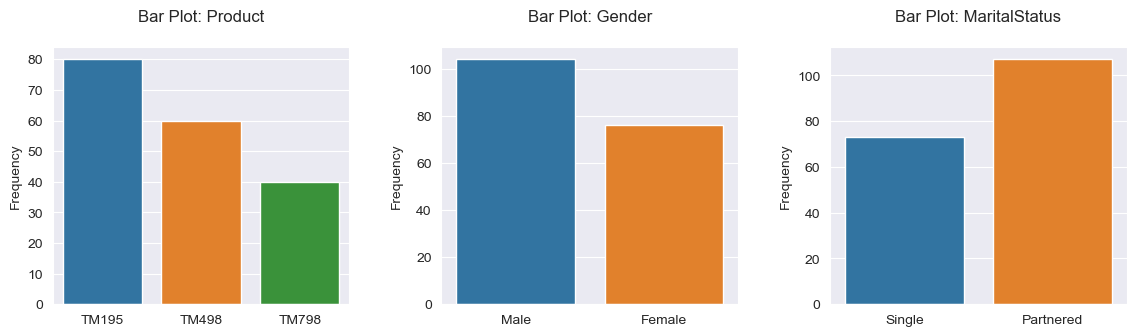

In [12]:
'''
Firstly, will start the Univariate Analysis by checking the distribution of Categorical Columns.
Subplots will be used, noting that the label of X Axis has been hide for more clarity and to avoid expected overlap between the plots:
'''
fig, axis = plt.subplots(1, len(objects_var), figsize=(12, 4)) # 1 Rows X 3 Columns = 3 Plots
for index, element in enumerate(objects_var):
    sns.countplot(data=df, x=element, ax=axis[index])
    plt.setp(axis[index], xlabel='')
    plt.setp(axis[index], ylabel='Frequency')
    plt.setp(axis[index], title='Bar Plot: '+ element+'\n')
    fig.tight_layout(pad=3.0)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Product TM195 has more customers than other products; It might be translated into more popularity, less price, higher specifications, or others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Male customers tend to have treadmills more than Females, the same applies also for more Partners over Singles.

In [13]:
# Lets Explore the enumeration of each Category in Categorical Columns:
print(pd.crosstab(df['Product'],df['Gender']),'\n')
print(pd.crosstab(df['Product'],df['MaritalStatus']))

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33 

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** All categories seem to have either equivalent or convergent enumeration except the Partners who are using Product TM798.

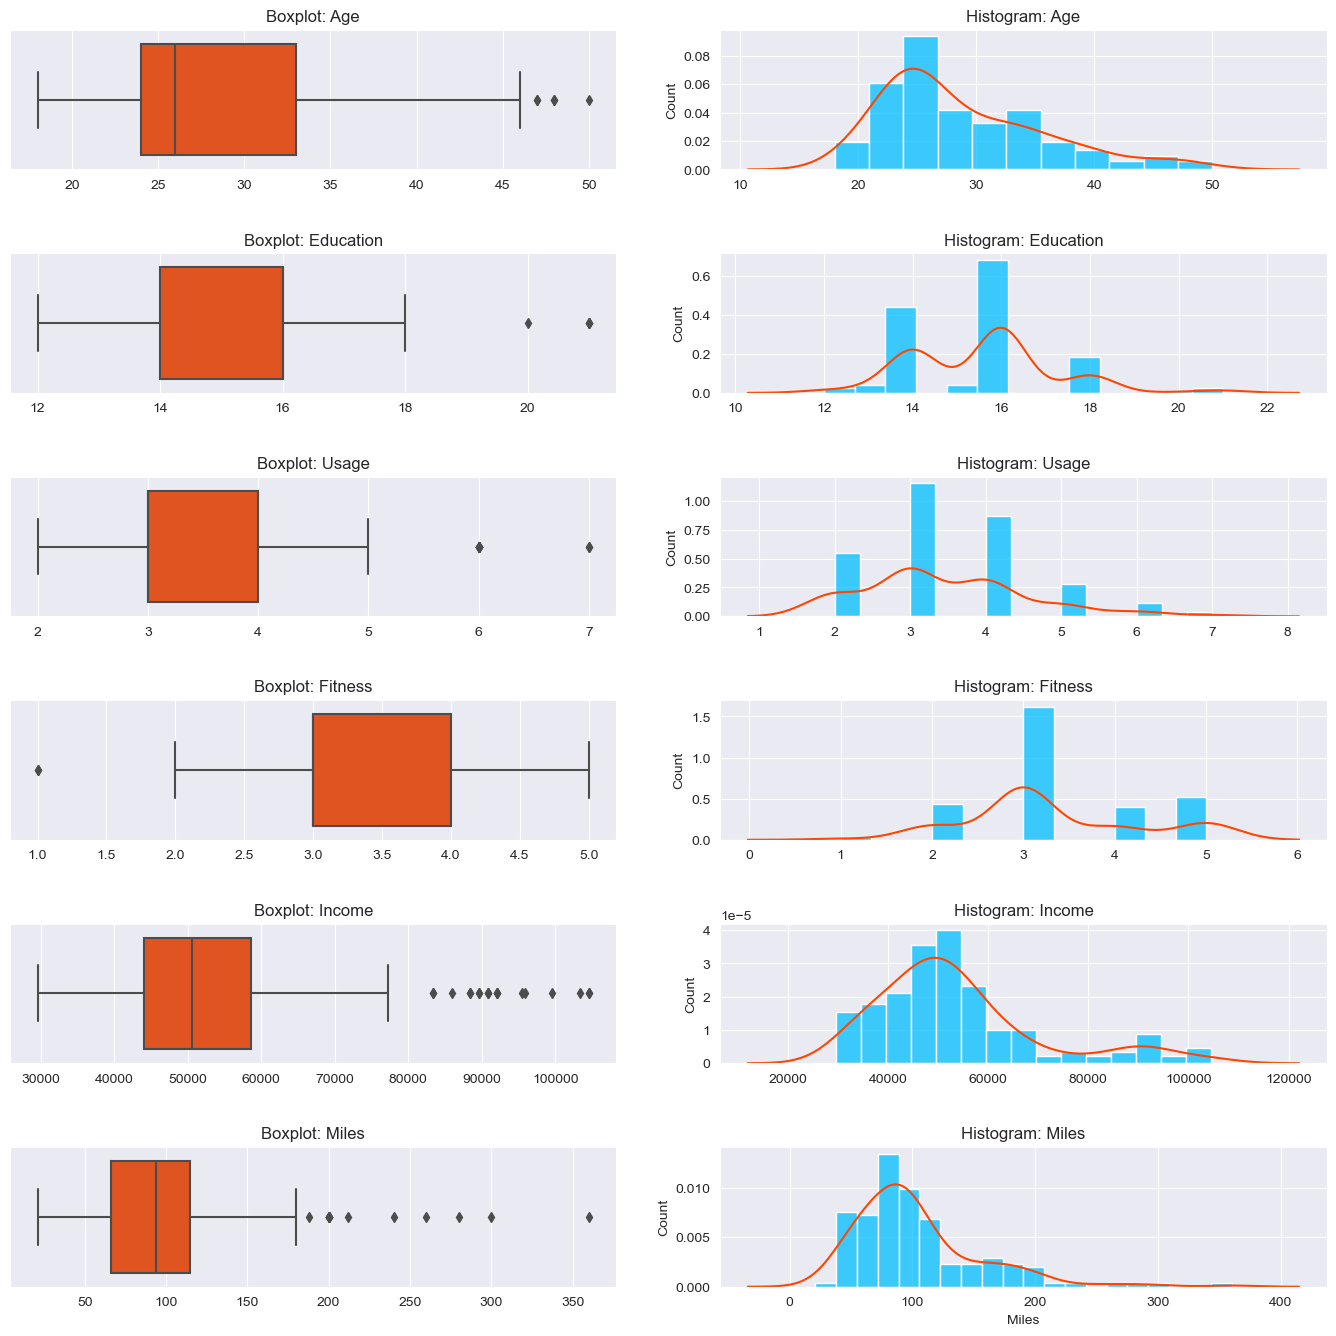

In [14]:
'''
Secondly, we will analyze the distribution of Numerical Columns.
Subplots will be used, noting that the X Axis label has been hide for more clarity and to avoid expected overlap between the plots:
'''
fig, axis = plt.subplots(len(numerics_var), 2, figsize=(14, 14)) # 6 Rows X 2 Columns = 12 Plots
i = 0
for element in numerics_var:
    j = 0
    sns.boxplot(data=df, x=element, ax=axis[i, j], color='orangered')
    plt.setp(axis[:, 0], xlabel='')
    plt.setp(axis[:, 1], xlabel='')
    plt.setp(axis[:, 1], ylabel='Count')
    plt.setp(axis[i:i+1, 0], title='Boxplot: '+ element)
    plt.setp(axis[i:i+1, 1], title='Histogram: '+ element)
    sns.histplot(data=df, x=element, ax=axis[i, j+1], color='deepskyblue', stat='density')
    sns.kdeplot(data=df, x=element, ax=axis[i, j+1], color='orangered')
    fig.tight_layout(pad=3.0)
    i+=1

In [15]:
# Additional Task: We'll find the No. of Outliers in each Numeric Column for better understanding of Dataset:
for element in  numerics_var:
    Q1 = df[element].quantile(0.25)
    Q2 = df[element].median()
    Q3 = df[element].quantile(0.75)
    IQR = Q3 - Q1
    Outliers = df[(df[element] < (Q1 - 1.5 * IQR)) | (df[element] > (Q3 + 1.5 * IQR))].shape[0]
    print(element,'Column has a Median of', Q2, 'and', Outliers, 'Outliers.'  )

Age Column has a Median of 26.0 and 5 Outliers.
Education Column has a Median of 16.0 and 4 Outliers.
Usage Column has a Median of 3.0 and 9 Outliers.
Fitness Column has a Median of 3.0 and 2 Outliers.
Income Column has a Median of 50596.5 and 19 Outliers.
Miles Column has a Median of 94.0 and 13 Outliers.


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.3 Observations:**
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.1 Age:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is Right Skewed, 5 Outliers are detected with values of (46, 47, and 50 Years).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations have been drawn from the Age Group 24-33 Years.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Outliers seem to be real and make sense.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.2 Education:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is Right Skewed, 4 Outliers are detected with values of (20 and 21 Years).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations have Years of Education between 14 and 16 Years.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Outliers seem to be real and make sense.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.3 Usage:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is Right Skewed, 9 Outliers are detected with values of (6 and 7 Times).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations are using the Treadmill 3 or 4 Times per Week. Also, Q1 equals to Q2 (Median).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Actually, this Column has a discrete Numeric Values which can be represented in a Bar Plot as well as in a Histogram.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Outliers seem to be real and make sense if we assume that some customers are using the Treadmill frequently on daily/semi-daily basis.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** In the forthcoming analyses, we might infer a positive relationship between Usage and Fitness/Miles.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.4 Fitness:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is a little Left Skewed, 2 Outliers are detected with a value of 1.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations have Self Rated Fitness Score of 3 or 4. Also, Q1 equals to Q2 (Median).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Actually, this Column has a discrete Numeric Values which can be represented in a Bar Plot as well as in a Histogram.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Outliers seem to be real and make sense if we assume that not all customers must have identical Fitness Scores.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **5.** In the forthcoming analyses, we might infer a positive relationship between Fitness Score and Usage/Miles.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.5 Income:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is Right Skewed, 19 Outliers are detected.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations have Annual Income between 44,058.75 and 58,668.00.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Outliers seem to be real and almost always occur when talking about Income/Salary.
<br>
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **3.3.6 Miles:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The distribution is Right Skewed, 13 Outliers are detected.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** 50% of the observations have Miles reading between 66 and 114.75.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Outliers are non-realistic. 200 or 360 Miles/Week does not make any kind of sense, a Typo Error is most likely.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** We might infer a positive relation between Miles and Usage. Higher Mileage must be positively associated with Higher Usage/Fitness.	

<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Bivariate Analysis:**  

In [16]:
'''
Firstly, we will start the Bivariate Analysis by discovering the Correlation between all Numeric Columns in the Dataset.
Correlations are our guidance into understanding the Positive or Negative impact of each Variable on the other.  
'''
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


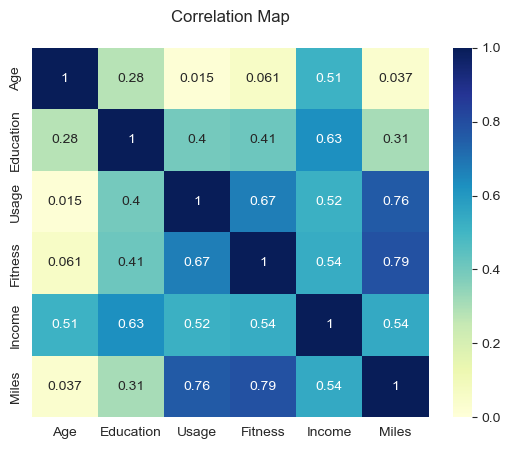

In [17]:
'''
Lets plot a Heatmap to visualize the correlation between Numerical Columns.
Since it's obvious from the above matrix that correlation varying between 0 and 1, we'll start at vmin = 0 for better colors variation:
'''
sns.heatmap(data=df.corr(), annot=True, vmin=0, vmax=1, cmap='YlGnBu')
plt.title('Correlation Map\n');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** No Negative Correlation has been detected which is somehow unusual.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** As expected, the strongest Positive Correlations are found between Fitness-Miles (0.79), Usage-Miles (0.76), and Usage-Fitness (0.67).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A Fairly Strong Positive Correlation is found between Income and Education (0.63); It indicates that more educated people have higher Income which is somewhat true (Not always, but could happen) and does not indicate irrational phenomena.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** A Moderate Positive Correlation is found between Income-Miles (0.54), Income-Fitness (0.54), and Income-Usage(0.52); It indicates that customers with higher income tend to keep fit as well as the educated customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** A Weak Positive Correlation is found between Age and Education-Miles (0.31), Education-Fitness (0.41), and Education-Usage (0.40).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** A Very Weak Positive Correlation is found between Age-Miles (0.037), Age-Fitness (0.061), and Age-Usage (0.015). Thus, Age is not our focus when studying the possible influencing factors.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Income appears to have higher impact on Miles (0.54) more than the Education (0.31).

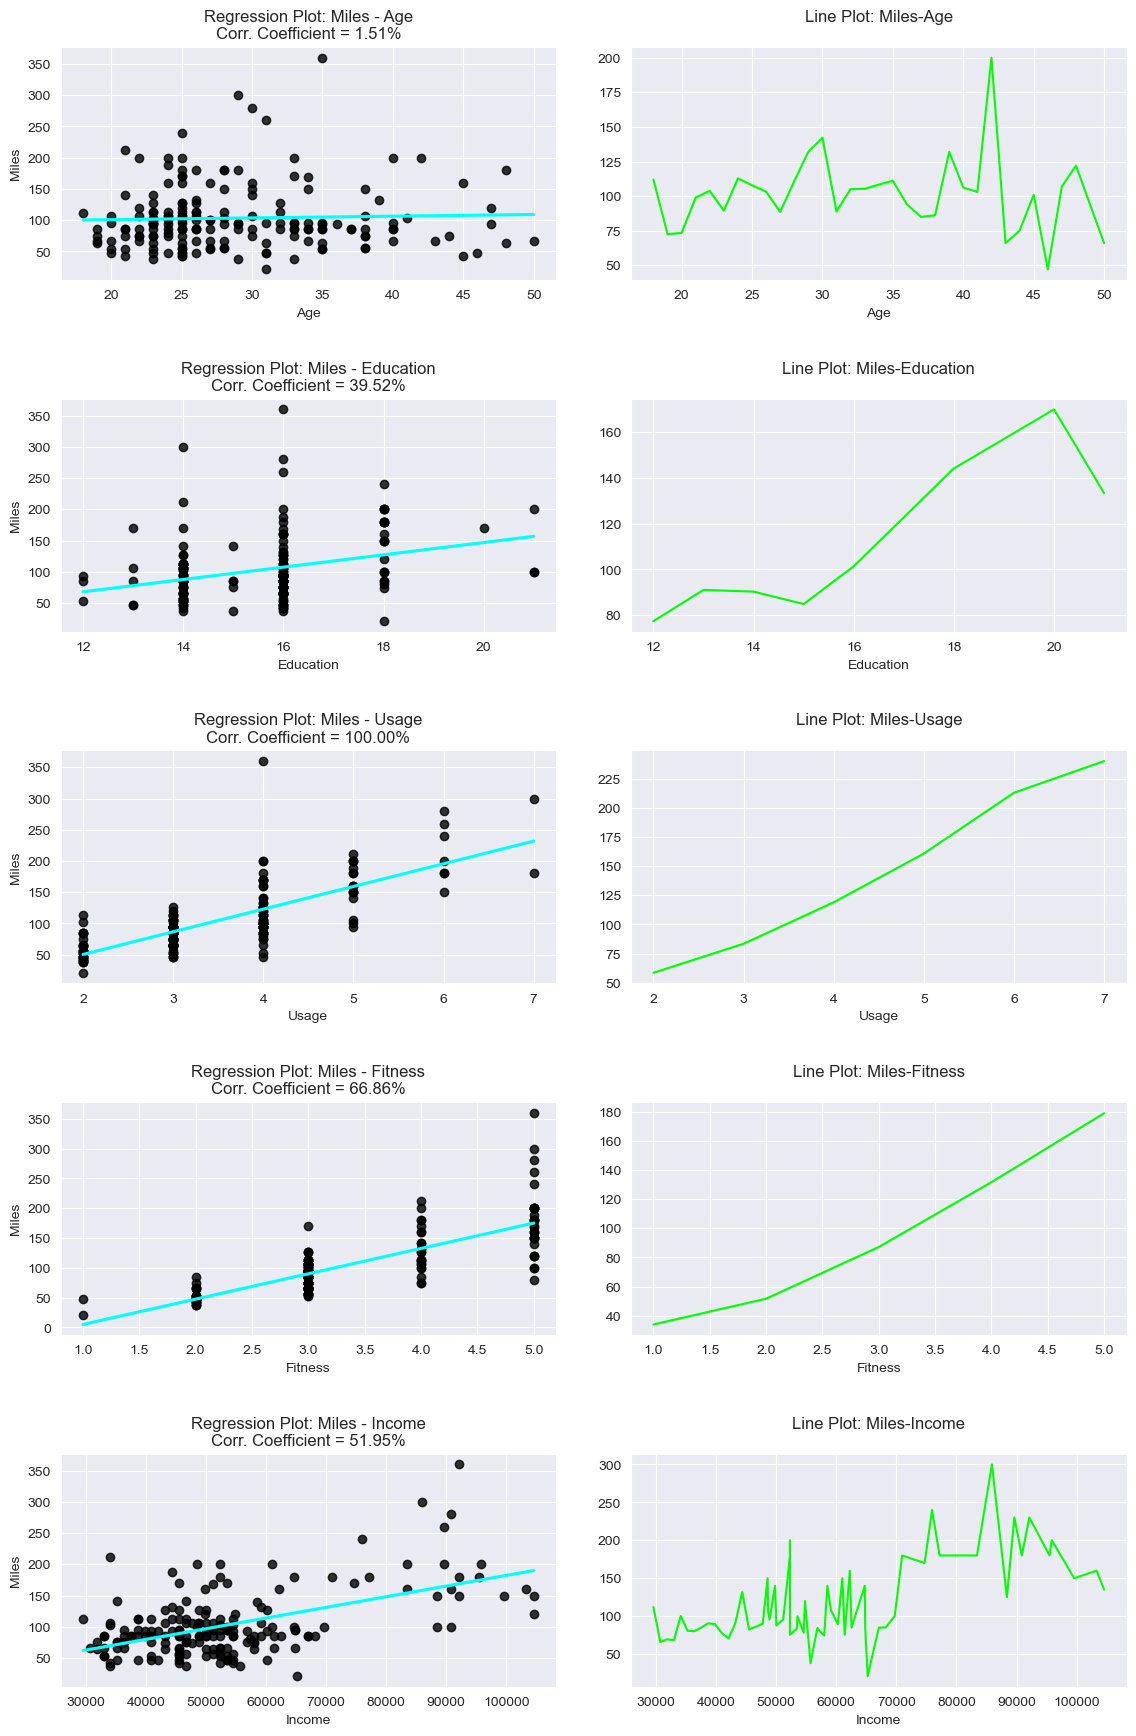

In [18]:
'''
Although the Heat Map shows significant information about the relationships between Numerical Variables, we will
use the Regression/Line Plots to visualize such relationships:
'''
fig, axis = plt.subplots(len(numerics_var)-1, 2, figsize=(12, 18)) # 5 Rows X 2 Columns = 10 Plots
i = 0
for element in numerics_var:
    if element != 'Miles':  # Excluding the Miles Variable from Iteration
        sns.regplot(data=df, x=element, y='Miles', ax=axis[i,0], color='Black', ci=False, line_kws={"color": "Cyan"})
        sns.lineplot(data=df, x=element, y='Miles', ax=axis[i,1], color='Lime', ci=False)
        plt.setp(axis[i:i+1, 0], title='Regression Plot: Miles - '+ element+'\n'+\
            'Corr. Coefficient = '+ str("{:.02%}".format(df[element].corr(df['Usage']))))
        plt.setp(axis[i:i+1, 1], title='Line Plot: Miles-'+ element+'\n')
        plt.setp(axis[:, 1], ylabel='')
        fig.tight_layout(pad=3.0)
        fig.text(0, 0, '') 
    i+=1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although of some rises in Age which might indicate a good usage in some Age groups, the overall correlation between Age and Mileage is very week - no obvious trend of increasing/decreasing in Mileage while the Age is increasing/decreasing (Further Analysis are required).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although of sudden decrease of Mileage when customers have 21 years of Education, still we can see a positive trend in Increasing of Mileage while years of Education are increasing.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** As eirlier expected, Fitness and Usage are positively correlated with Mileage.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** The Income do influence the Mileage positively, It's somehow fair to say that customers with higher income tend to use the Treadmills more than others. 

In [19]:
'''
To discover the reason behind sudden drop of Mileage for customers with 21 years of education, we will analyize 
the Dataset to infer some observations:
'''
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Only 3 customers have an education years of 20 and 21, They make up a small percentage of the total costomers (Around 2%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The largest number of consumers is concentrated in the Group 14-18 years of education.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** A significant trend of increasing in Miles is obviously noticed from 14 to 18 years of education.

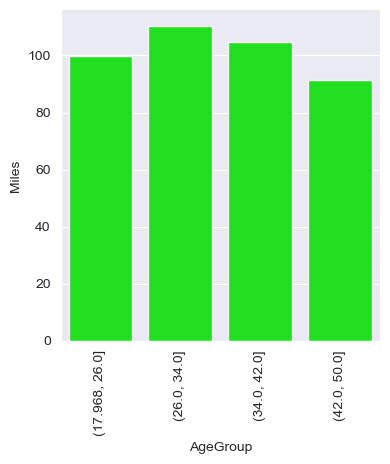

In [20]:
#To re-evaluate the relationship between Age and Miles, we will slice the Age observations into 8 equal slices, then visualize the Age-Miles again:
df['AgeGroup'] = pd.cut(df['Age'],4)

sns.catplot(data=df,x='AgeGroup',y='Miles',kind='bar', ci = False, color = 'Lime', height=4)
plt.xticks(rotation=90); 

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Based on the calculated Averages of Mileage in above Plot, Age Groups do not have a significant variations with Mileage; Thus, we cannot build any assumption or infer a relationship. 

In [21]:
# Dropping the AgeGroup Column from the Dataset as it's no longer required in our analysis.
df = df.drop('AgeGroup',axis=1)

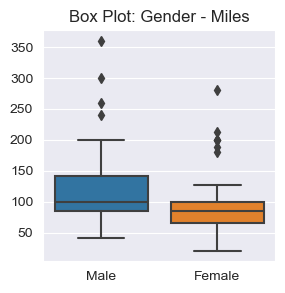

In [22]:
# In order to continue with our Bivariate Analysis, We will visualize the relationship between Gender and Miles:
plt.figure(figsize = (3 , 3))
sns.boxplot(data=df, x="Gender", y="Miles")
plt.title('Box Plot: Gender - Miles')
plt.xlabel('') 
plt.ylabel('') 
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.5 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** At least, 25% of Males in the Dataset have a higher Mileage than Females. 

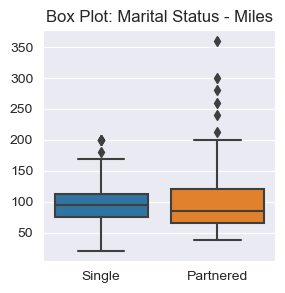

In [23]:
# In order to complete our Bivariate Analysis, We will visualize the relationship between Marital Status and Miles:
plt.figure(figsize = (3 , 3))
sns.boxplot(data=df, x="MaritalStatus", y="Miles")
plt.title('Box Plot: Marital Status - Miles')
plt.xlabel('') 
plt.ylabel('') 
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.6 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Partners seem to have mopre variability in terms of Mileage comparing with Singles. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Except the Variability, no obvious difference between Singles and Partners; both of them have convergent Mileage. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** In order to recommend a specific type of a Treadmills, we have to make some Multivariate Analysis to discover the effects of different variables on the Miles for each Product.

  1 - Violin Plot: Products vs Age
    - TM195 Mean = 28.55
    - TM498 Mean = 28.9
    - TM798 Mean = 29.1


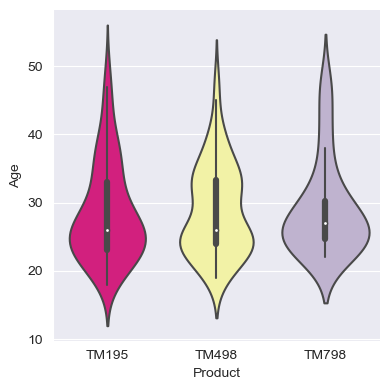


  2 - Violin Plot: Products vs Education
    - TM195 Mean = 15.04
    - TM498 Mean = 15.12
    - TM798 Mean = 17.32


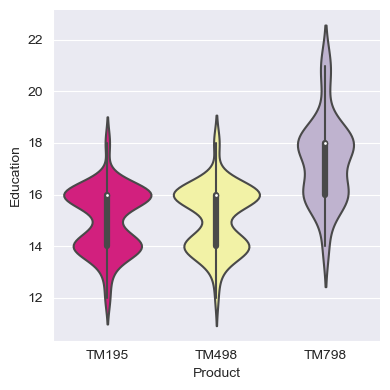


  3 - Violin Plot: Products vs Usage
    - TM195 Mean = 3.09
    - TM498 Mean = 3.07
    - TM798 Mean = 4.78


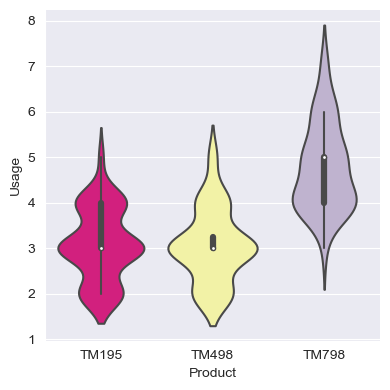


  4 - Violin Plot: Products vs Fitness
    - TM195 Mean = 2.96
    - TM498 Mean = 2.9
    - TM798 Mean = 4.62


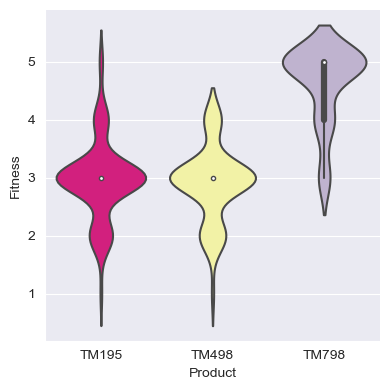


  5 - Violin Plot: Products vs Income
    - TM195 Mean = 46,418.03
    - TM498 Mean = 48,973.65
    - TM798 Mean = 75,441.57


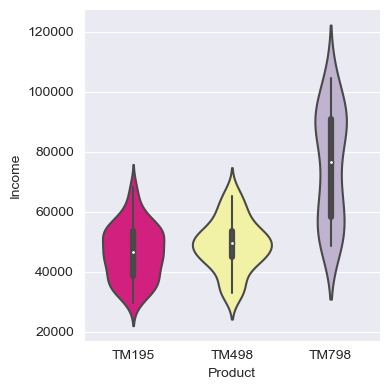


  6 - Violin Plot: Products vs Miles
    - TM195 Mean = 82.79
    - TM498 Mean = 87.93
    - TM798 Mean = 166.9


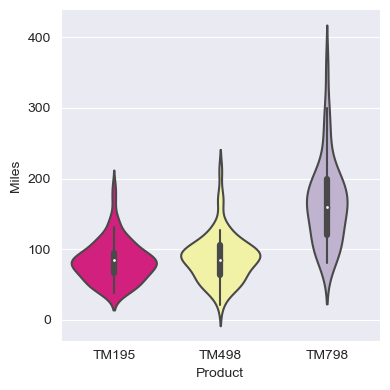

In [24]:
# To deeply investigate the Numerical characteristics of each Product, we will use the violin Plot to infer more relationships:
products = df['Product'].unique().tolist() # Creating a List of Unique Categories in the Product Column
i =  1
for column in numerics_var:
    print('\033[1m', '\033[92m', i, '- Violin Plot: Products vs', column) # Contains Special Font Formatting
    for product in products:
        mean = round(np.mean(df[df['Product']==product][column]),2) 
        print('\033[1m', '\033[94m   -',product, 'Mean =', f"{mean:,}")
    sns.catplot(data=df, x='Product', y=column, kind='violin' , ci=False, height=4, \
        showfliers=False, palette='Accent_r')
    plt.show();
    print()
    i += 1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.7 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The variability of customers ages for Product TM798 is somehow less than the others, it might indicate that these customers are athletes especially when knowing that they've the highest Mileage among others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Another proof, The Customer's Fitness of TM798 is higher than others; Mean of TM798 is 4.62 while it's similar and around 2.93 for both TM498 and TM195.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.**  It's quite clear now, Mean of Customers in terms of Usage is highr for Product TM798, It's 4.78 for TM798 and again similar and around 3.08 for both TM498 and TM195.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Multivariate Analysis:**  

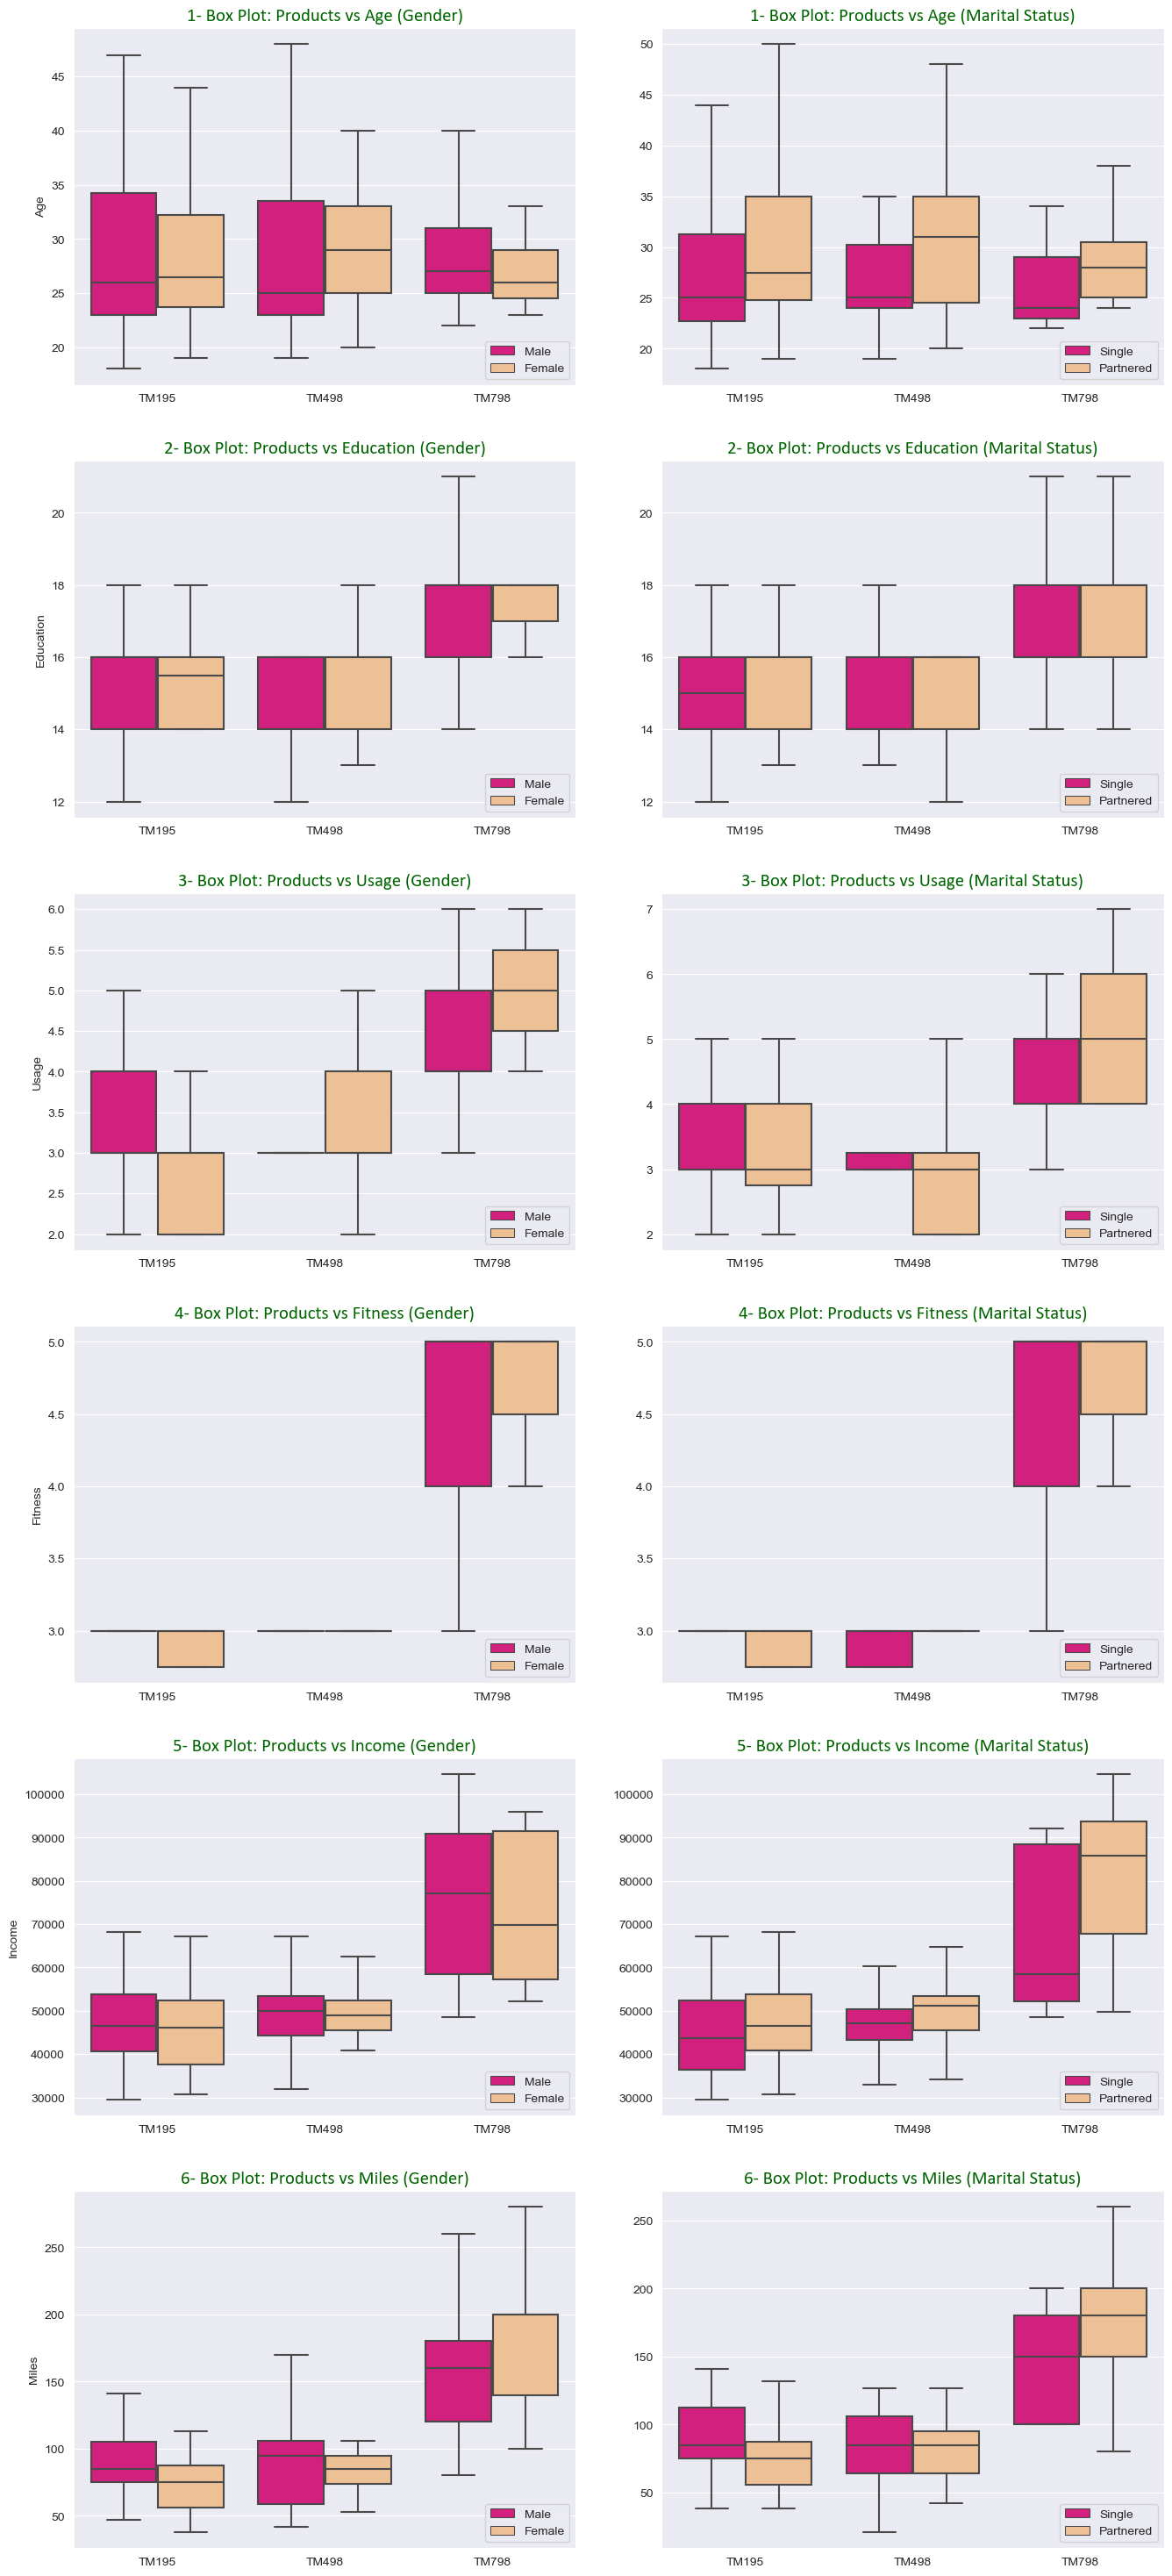

In [25]:
'''
Now; It's the time to study the impacts of Categorical Variables (Gender and Marital Status) on Numerical Variables.
To have a deep insight and in order to differentiate between different types of Categorical variables (Single-Male differs 
from Partnered-Male and so on), We will use the Cat Plot with all Categories at once:
'''
fig, axis = plt.subplots(len(numerics_var), 2, figsize=(14, 30))

for index, column in enumerate(numerics_var):
    
    title1 = str(index+1) + '- Box Plot: Products vs ' + column +' (Gender)'
    title2 = str(index+1) + '- Box Plot: Products vs ' + column +' (Marital Status)'
    font = {'size': 15, 'fontname':'Calibri', 'color':'DarkGreen'} # Formatting the Title Font
    sns.boxplot(data=df, x='Product', y=column, hue='Gender', ax=axis[index, 0], palette='Accent_r', \
        showfliers=False).set_title(title1,fontdict=font)
    axis[index, 0].legend(loc='lower right') # Relocating the Legends
    
    sns.boxplot(data=df, x='Product', y=column, hue='MaritalStatus', ax=axis[index, 1], palette='Accent_r', \
        showfliers=False).set_title(title2,fontdict=font)
    axis[index, 1].legend(loc='lower right') # Relocating the Legends
        
    plt.setp(axis[:, 0], xlabel='')
    plt.setp(axis[:, 1], xlabel='')
    plt.setp(axis[:, 1], ylabel='')
    fig.tight_layout(pad=3.0)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The variability in age for Males/Females customers of product TM798 looks smaller than the customers of other products. also, partners customers are almost older than singles for all Products.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Both Males/Females customers of product TM798 are most educated than others, while the customers for both TM195 and TM498 have approximate the same years of education; The same applied on Partner/Single Customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Customers of product TM195 have a higher usage than others, while a disparity is obvious when analyzing the usage of TM195 and TM798.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Again, it's obvious that the customers of TM798 have the the best fitness scores whatever their classification, while both TM195 and TM498 customers have similar fitness scores.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Customers of product TM798 are richer than others while both TM195 and TM498 customers belong - approximately - to the same income bracket. Also, it's fait to say that Males have higher income than Females for all products.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** The customers of TM798 are dominant with a wide margin, they have a quite higher Mileage comparing the other customers; Also, both of TM195 and TM498 customers show a convergent readings.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Outliers Treatments:**  

In [26]:
'''
As noted earlier, it's impossible and unusual for a human being to use the Treadmill more than 200 Miles/Week (Arround 45 KM/Day)!
What about those who use it 360 Miles/Week!!
Thus, we will treat the outliers in Miles Column by replacing the values of Right/Left Outliers with the value of Right/Left Whisker:
'''

def treat_outliers(dataframe,column):   
    Q1 = dataframe[column].quantile(0.25)  
    Q3 = dataframe[column].quantile(0.75)  
    IQR = Q3 - Q1     
           
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    dataframe[column] = np.clip(dataframe[column], lower_whisker, upper_whisker) 

    return df

df2 = treat_outliers(df,'Miles')

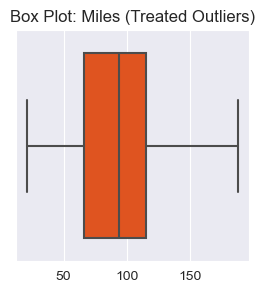

In [27]:
# We will make sure that Outliers in Miles Column have been treated successfully:
plt.figure(figsize=(3, 3))       
sns.boxplot(data=df, x='Miles', color='orangered')
plt.title('Box Plot: Miles (Treated Outliers)')
plt.xlabel('')
plt.show();

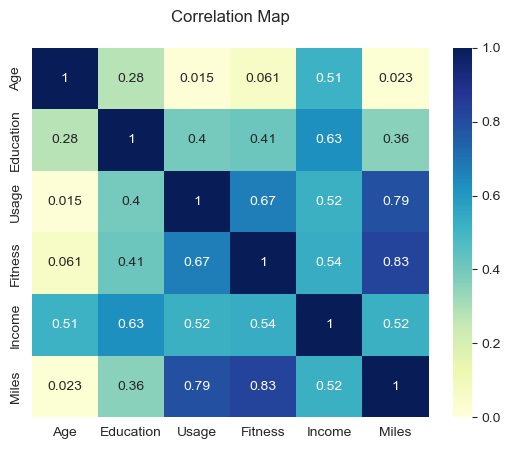

In [28]:
# Lets visualize some Plots one last time to make sure that out previous understandings remain unchanged: 
sns.heatmap(data=df.corr(), annot=True, vmin=0, vmax=1, cmap='YlGnBu')
plt.title('Correlation Map\n');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **6.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** There is an improvement in the correlation of Miles-Usage and Miles-Fitness (Around 3.5%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The remaining correlations remain approximately unchanged. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** It looks like the Outliers Treatment will not result in noticeable impact on the previous results.conclusions.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **7. Business Insights:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> During the analysis, the focal point was the Product type, there are 3 product types with different customer characteristics have been observed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> In order to be able to give our business recommendations and expectations about future sales and which type of customers must be targetted, we were in a real need to determine the most important factors that have a positive influence.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> We didn't rely - only - on how many customers who currently own a Treadmill, there is a huge difference between the customer who really use his Treadmill (the one who is not committed to keeping fit) and the one who just buy it to complement his furniture collection!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Consequently, we've adopted The Mileage as the most important factor that indicates the real usage.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.1 Miles:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers have higher Mileage than others with a Mean of 152.57, while both TM195 and TM498 have lower and similar Mileage (82.79 and 87.53 respectively).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** The customers with such higher Mileage can be considered as athletic customers.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** The Female Customers of product TM798 have higher Mileage than Males, also partners have are higher then Singles.
    
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.2 Age:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers looks younger than other customers, while both TM195 and TM498 looks older with similar ages. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** The variability in TM195 and TM498 customer ages is wider than TM798 customers, the same applied also for Partners/Singles.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.3 Fitness:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers have higher Fitness Scores than others with a Mean of 4.62, while both TM195 and TM498 have lower and similar Fitness Scores (2.96 and 2.90 respectively).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** The conclusion is logic due to the strong positive correlation between Fitness and Miles.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Another proof that TM798 customers could be athletic.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.4 Usage:**
<br><left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers have higher Usage than others with a Mean of 4.78, while both TM195 and TM498 have lower and similar Usage (3.09 and 3,07 respectively).
<br><left> <font size=4 style='font-family:Courier New' color='Black'> **2.** The conclusion is logic due to the strong positive correlation between Usage and Miles.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.5 Education:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers have the highest education among others (around 16-18 Years), while both TM195 and TM498 have lower and similar Education (around 14-16 Years).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** We can say that TM798 customers are probably have postgraduate degrees.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.6 Income:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** TM798 customers have the highest Income among others (around 50K-95K), while both TM195 and TM498 have lower and similar Income (around 38K-50K).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.**Because the Customers of TM798 are richer than others, it might indicate a higher price product and definitely a higher spec.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.**Due to that Both TM195 and TM498 are similar in Income, it might indicate that they are using similar specs products with similar prices.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.**Remembering that there was a positive correlation between Income and each of Education, Age, Miles, Fitness, and Usage.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **7.7 Gender / Marital Status:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Male customers tend to own a Treadmill more than Female (104:76).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Partners customers tend to own a Treadmill more than Singles (107:73).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Partners of palmost higher then Singles in terms of Fitness, Usage, Mileage, and Income, while they are older and have approximate the same years of education.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** Our conclusions still correct after applying Multivariate Analysis; TM798 is dominating over others, Both single/Partnered, Male/Female show a convergent range for each type.


<left> <font size=6 style='font-family:Courier New' color='Orange' > **8. Business Recommendations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Product TM798 has the best expectations of growth in future sales among other products or at least the After-Sale Services/Spare Parts due to heavy usage and the distinctive experience by the customers who are using it intensively.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Product TM798 still represents the best choice for educated/Athletic/rich customers. Thus, a marketing plan for similar classes in the society will have a huge impact on future sales/growth.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Partnered Males/Females who are using Product TM798 are considered as a promised customers more than Single Males/Females (Higher Mileage and Income). But generally, Product TM798 can still considered as a promised product.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Keep marketing the products TM195 and TM498 for limited budget customers. Furthermore, a merketing plans is a must to increase the segment of Female customers for all products.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Although Product TM195 is a mass-appeal product due to high sales, it does not show extensive usage in terms of Mileage. A n optional survey for current customers might help to understand why they are not using this product intensively. Also, a similar survey for Product TM498 might be conducted to help the retail store ruling out any product issue that may affect its reputation badly (Again, it’s an optional step).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** The vast majority of all customers whatever their Fitness Records, Mileage, Income, etc, are approximately 24-34 years old. Thus, any marketing plan regardless of product type must target this slice. Further, Additional marketing plans is a must to expand the circle of customers outside this age range.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Finally, all products are important when talking about future sales/growth; each product has its own customers, and every customer has relatives/friends to advise/encourage them to experience such product.